## Global Power Plant Database
Problem Statement:
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

Find the dataset link below. 

Downlaod Files:
https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:

df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df.head()


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


#### As we can see, this Global Power Plant dataset is containg 25 columns where the data contains a good blend of categorical, numerical and missing values.

#### These 2 columns are the dependent variables 'primary_fuel' and 'capacity_mw'.

In [3]:
df.shape # Checking the shape

(907, 27)

In [4]:
df.isna().sum() # checking null values

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

#### We can see there is a lot of null values, we need to clean before model creation

In [5]:
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

#### we can see columns are containing different counts of categories like, country column is having only one category. The target variable, primary_fuel is having 8 categories , so it is a multiclass column that we will combine into binary class to get ROC_AUC curve.

In [6]:
df.dtypes # checking Data types

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

#### Data is having nominal continous and categorical values. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

#### we can see, other than country ,country_long ,name ,gppd_idnr ,capacity_mw ,primary_fuel ,source ,url columns there are missing values in every columns.

In [8]:
df.describe() # State summary

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


#### Only Capacity_mw column is having 908 count of values , other than that all the discrete as well as continuous value containing columns are having missing values.

#### Difference of quartile 3 and maximum of longitude column is a little deviated maybe there is skewness in the column.

#### other_fuel3, wepp_id,year_of_capacity_data,estimated_generation_gwh and  generation_gwh_2019  is containing only missing values. We need to remove this column before model creation.

#### generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017, in these columns the mean value is lesser than standard deviation, that means the data is so much deviated. Outliers are present, Skewness is there, that

#### we need to take care. These columns are also containing minimum value 0 that we need to replace before model creation.


## Univariate Analysis: 
#### We will take all the continuous and numerical data into single variable before Analysis.

In [9]:
df_con_features=df[['latitude','longitude',
                    'generation_gwh_2013','generation_gwh_2014',
                    'generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]

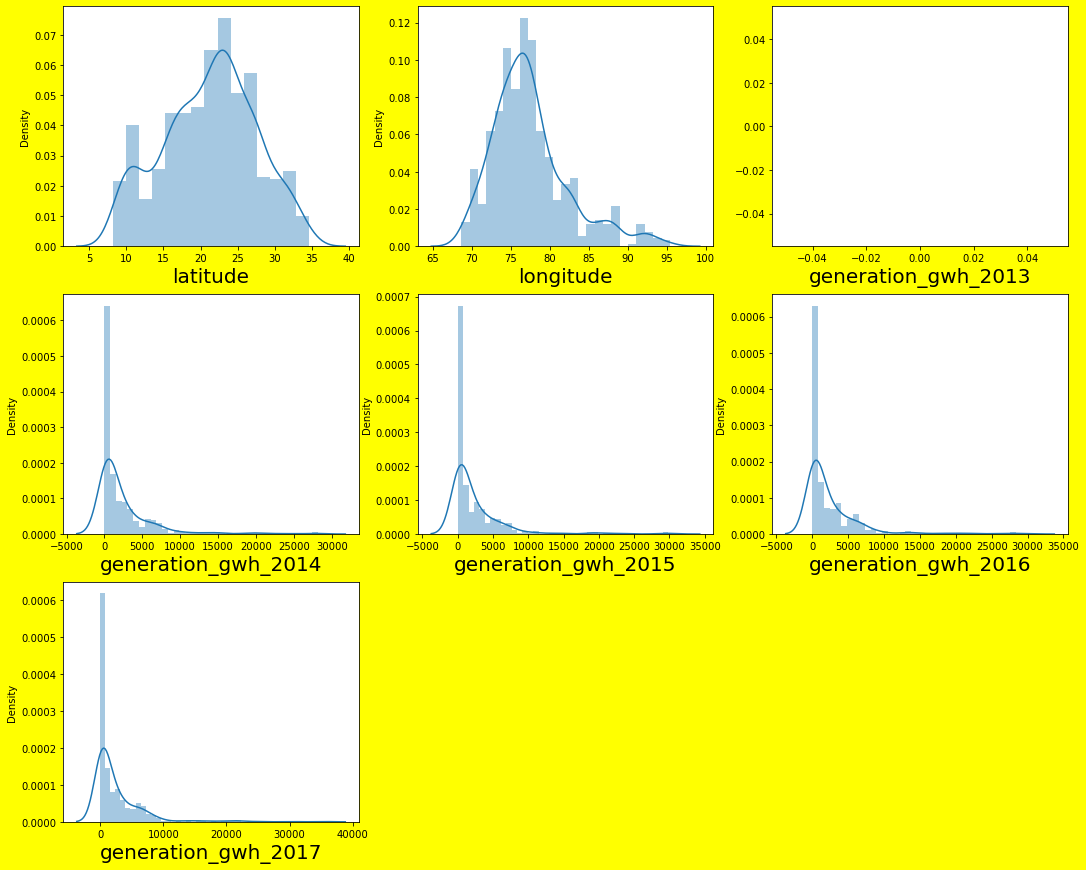

In [10]:
plt.figure(figsize=(18,15),facecolor='yellow')
plotnumber=1
for column in df_con_features:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df_con_features[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show();

#### generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 all these features are so much right skewed

### dropping unnessesory columns:

In [11]:
drop_columns=['country','name','gppd_idnr','country_long','other_fuel1','other_fuel2', 'generation_gwh_2013','other_fuel3','url','wepp_id', 'generation_gwh_2019', 'estimated_generation_gwh',
              'year_of_capacity_data']
df=df.drop(columns=drop_columns,axis=1)

## Outlier Detection

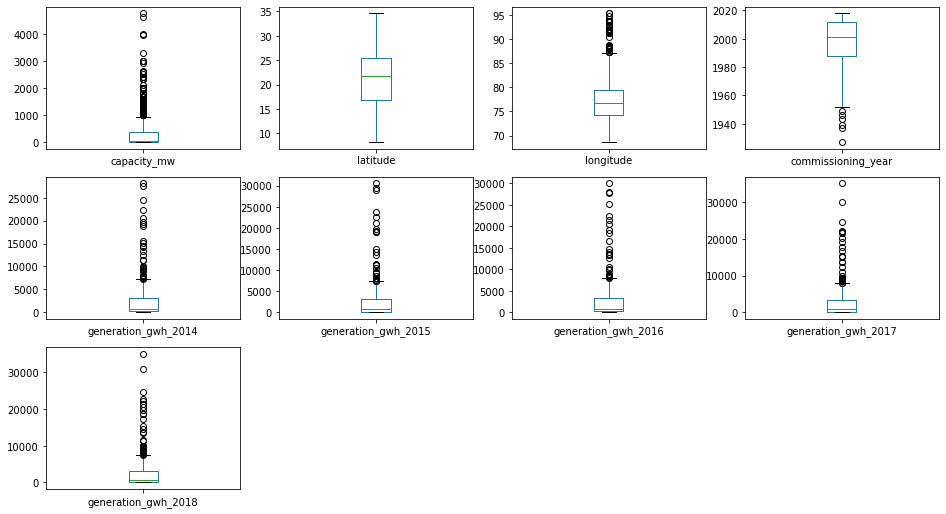

In [12]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(16,12));

#### Except latitude column all the continuous columns are having outliers that we need to take care.

#### encode the categories of the target variable 'primary_fuel':

In [13]:
df['primary_fuel']= df['primary_fuel'].replace({'Hydro':1,'Coal':2,'Solar':3,'Wind':4,'Gas':5,'Biomass':6,'Oil':7,'Nuclear':8})

In [14]:
## divide the target variable primary_fuel and features
y = df['primary_fuel']
x = df.drop(columns=['primary_fuel'])
x

,capacity_mw,latitude,longitude,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2004.0,NaN,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,1800.0,21.9603,82.4091,2015.0,NaN,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,2016.0,NaN,Central Electricity Authority,WRI,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,3.0,12.8932,78.1654,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
904,25.5,15.2758,75.5811,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
905,80.0,24.3500,73.7477,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN


## Bivariate analysis
#### Checking the relation between Primary fuel with continuous features first.

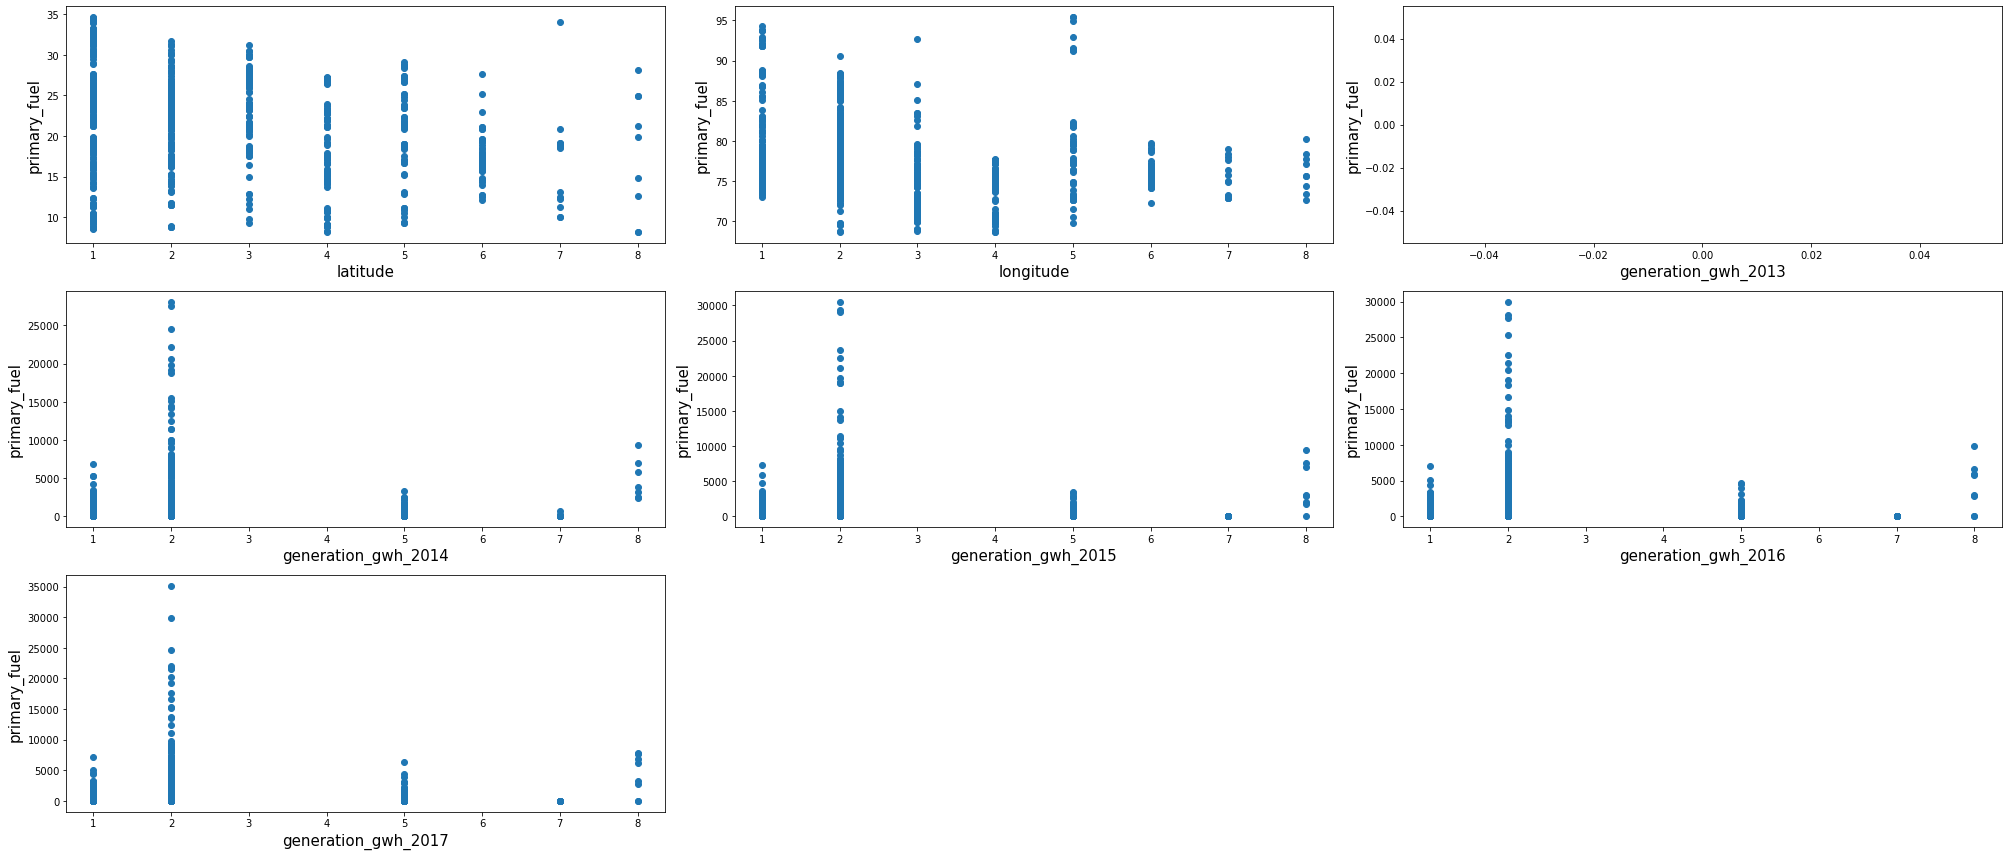

In [15]:
plt.figure(figsize=(28,12),facecolor='white')
plotnumber=1
for column in df_con_features:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(y,df_con_features[column])
        plt.xlabel(column,fontsize=15)
        plt.ylabel('primary_fuel',fontsize=15)
    plotnumber+=1
plt.tight_layout();

#### we can see, latitude of Hydro and coal power plants are more than other types of power plants. longitude of Hydro and coal power plants are more than other types of power plants.From 2013 to 2017 electricity is generated highest by coal power plants and 2nd highest is by Hydro power plants.

## Check the relation of target with Categerical features. 

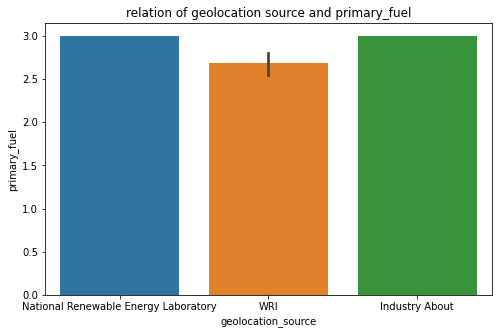

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(x='geolocation_source',y='primary_fuel',data=df).set_title('relation of geolocation source and primary_fuel')
plt.show();

In [17]:
Y = df['capacity_mw']
X = df.drop(columns=['capacity_mw'])
X

,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,28.1839,73.2407,3,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,24.7663,74.6090,2,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,21.9038,69.3732,4,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,23.8712,91.3602,5,2004.0,NaN,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,21.9603,82.4091,2,2015.0,NaN,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,16.2949,77.3568,2,2016.0,NaN,Central Electricity Authority,WRI,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,12.8932,78.1654,3,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN
904,15.2758,75.5811,4,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN
905,24.3500,73.7477,2,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN


#### Data Divided into label and features. 

## Visualize  the relation capacity_mw with Continuous variable 

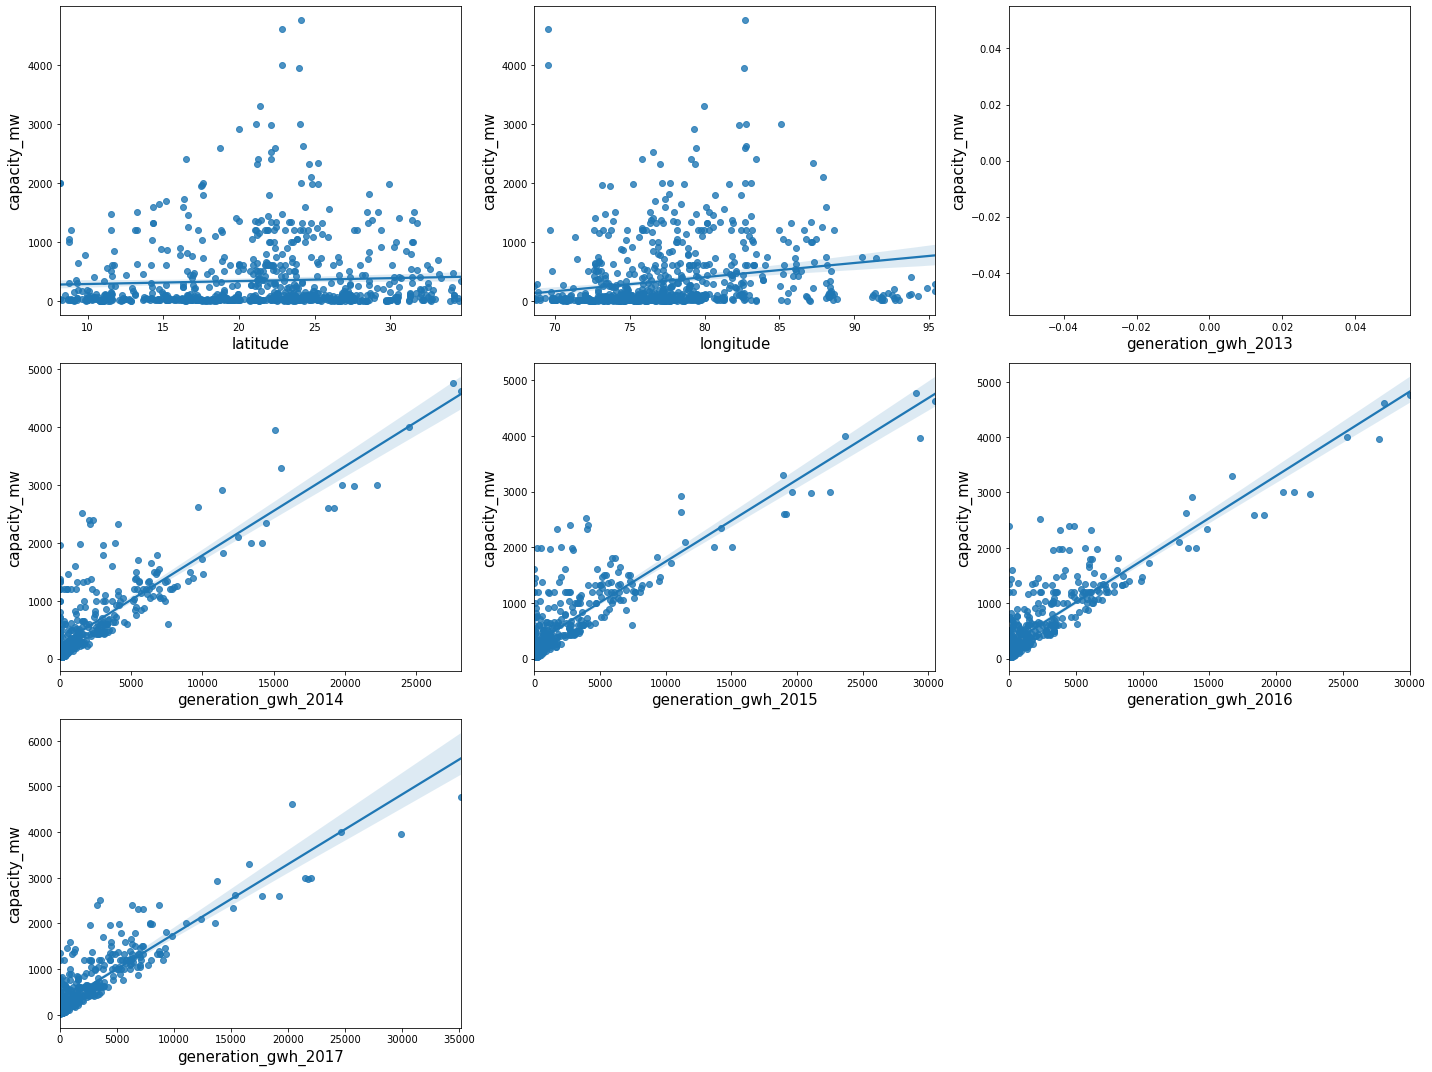

In [18]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in df_con_features:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        sns.regplot(df_con_features[column],Y)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('capacity_mw',fontsize=15)
    plotnumber+=1
plt.tight_layout();

#### There is not much relation between capacity_mw with latitude and longitude. Other than that from 2013 to 2017 the generation of electricity is somewhat linearly correlated with capacity_mw.

## Mutivariate Analysis: 

Checking corr. 

In [19]:
corr = df.corr()
corr

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.051309,0.197129,-0.129355,0.304087,0.839094,0.844352,0.870620,0.886673,0.901918
latitude,0.051309,1.000000,0.036362,-0.230579,0.129902,0.060330,0.048610,0.041387,0.040568,0.040476
longitude,0.197129,0.036362,1.000000,-0.260953,0.121910,0.013511,0.022760,0.050732,0.048678,0.045599
primary_fuel,-0.129355,-0.230579,-0.260953,1.000000,0.203989,-0.006058,-0.004633,-0.008204,0.018031,-0.008324
commissioning_year,0.304087,0.129902,0.121910,0.203989,1.000000,0.160014,0.170363,0.193743,0.191367,0.193694
generation_gwh_2014,0.839094,0.060330,0.013511,-0.006058,0.160014,1.000000,0.961098,0.937060,0.912561,0.902781
generation_gwh_2015,0.844352,0.048610,0.022760,-0.004633,0.170363,0.961098,1.000000,0.974918,0.940191,0.934371
generation_gwh_2016,0.870620,0.041387,0.050732,-0.008204,0.193743,0.937060,0.974918,1.000000,0.972024,0.962073
generation_gwh_2017,0.886673,0.040568,0.048678,0.018031,0.191367,0.912561,0.940191,0.972024,1.000000,0.985856
generation_gwh_2018,0.901918,0.040476,0.045599,-0.008324,0.193694,0.902781,0.934371,0.962073,0.985856,1.000000


## Plotting Heatmap (corr matrix)

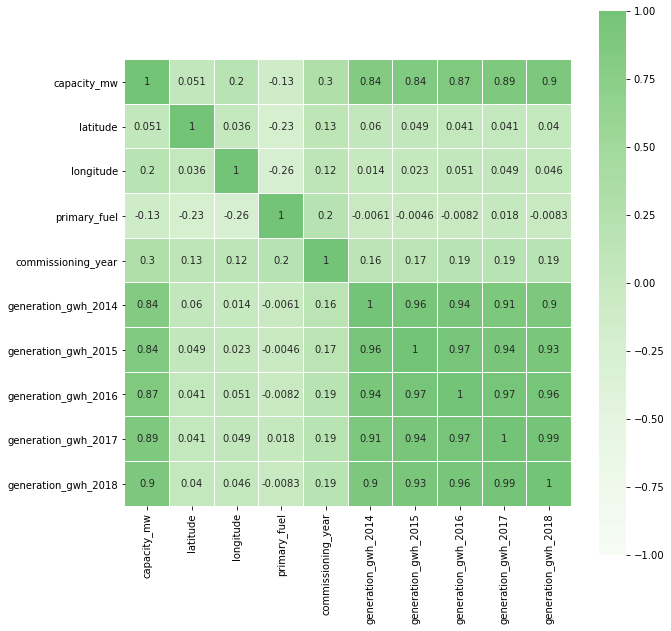

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,cmap='Greens',vmin=-1,vmax=1,square=True,fmt='.2g',annot=True,
            center=True,annot_kws={'size':10},linewidths=.1,linecolor='white')
plt.show();

#### As we can see, all the generation_gwh is correlated with capacity_mw and that will be good for our regression model.

#### Least correlation between features important for Classification problem.

#### there maybe correlation between generation gwh but we will not drop those, as those are correlated with the independent variable capasity_mw

## Data Cleaning: 
let's check the missing value first

In [21]:
df.isna().sum()

capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     565
source                      0
geolocation_source         19
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

#### There are so many missing values present in different features. We will fill those using mean or median depending upon requirements.

In [22]:
df['latitude'].fillna(df['latitude'].mean(),inplace=True)   #replacing missing value with mean for latitude column
df['longitude'].fillna(df['longitude'].median(),inplace=True)  #replacing missing values with median for longitude column
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0]) #replacing missing values of geolocation source by using mode
df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].median(),inplace=True) #replacing missing value with median for generation_gwh_2018 column
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median(),inplace=True) #replacing missing value with median for generation_gwh_2014 column
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median(),inplace=True) #replacing missing value with median for generation_gwh_2015 column
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median(),inplace=True) #replacing missing value with median for generation_gwh_2016 column
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median(),inplace=True) #replacing missing value with median for generation_gwh_2017 column
df['generation_data_source'] = df['generation_data_source'].fillna(df['generation_data_source'].mode()[0]) #replacing missing values of generation_data_source

In [23]:
#checkig is there any missing value present or not.
df.isna().sum()

capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
commissioning_year        380
owner                     565
source                      0
geolocation_source          0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_gwh_2018         0
generation_data_source      0
dtype: int64

In [24]:
#### missing value present in those unnecessory columns. So we are going to drop those column.
drop_column=['commissioning_year','owner']  #DROP
df=df.drop(columns=drop_column,axis=1)

In [25]:
# checking null values again
df.isnull().sum()

capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
source                    0
geolocation_source        0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

#### No Null values 

## Encoder: 
Now let's encode the nominal and categorical data into numerical data for using in model. For that we are using ordinal encoder.

In [26]:
from sklearn.preprocessing import OrdinalEncoder

en=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=en.fit_transform(df[i].values.reshape(-1,1))
df.head()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,3,109.0,1.0,801.123775,711.181225,737.205450,817.977250,751.644375,0.0
1,98.0,24.7663,74.6090,2,174.0,2.0,801.123775,711.181225,737.205450,817.977250,751.644375,0.0
2,39.2,21.9038,69.3732,4,21.0,2.0,801.123775,711.181225,737.205450,817.977250,751.644375,0.0
3,135.0,23.8712,91.3602,5,22.0,2.0,617.789264,843.747000,886.004428,663.774500,626.239128,0.0
4,1800.0,21.9603,82.4091,2,22.0,2.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0.0


In [27]:
df.dtypes

capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel                int64
source                    float64
geolocation_source        float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source    float64
dtype: object

In [28]:
# we need to drop one more unnecessory data that is, generation_data_source as it is containing only 0.0 values in it.
df=df.drop(columns= 'generation_data_source', axis=1)

## Skewness 

In [29]:
df.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              1.163320
primary_fuel           0.933587
source                 1.827373
geolocation_source    -2.159841
generation_gwh_2014    5.321360
generation_gwh_2015    5.566773
generation_gwh_2016    5.281953
generation_gwh_2017    5.315103
generation_gwh_2018    5.133226
dtype: float64

#### Most of the features are having skewness that we need to remove. 

## Power Transform mathod
Removing skewness using Power transform

In [30]:
# We are taking all the skewed continuous features into single variable
features=['longitude','generation_gwh_2018','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']

In [31]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')  #using yeo-johnson method
df[features]=scaler.fit_transform(df[features].values) #scaling the features

In [32]:
df[features]

,longitude,generation_gwh_2018,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,-0.944854,-0.061174,-0.046742,-0.052449,-0.050215,-0.039359
1,-0.534212,-0.061174,-0.046742,-0.052449,-0.050215,-0.039359
2,-2.390933,-0.061174,-0.046742,-0.052449,-0.050215,-0.039359
3,2.167755,-0.184018,-0.243102,0.072704,0.083178,-0.185637
4,1.126913,1.919439,1.152947,1.836146,1.842814,1.621580
...,...,...,...,...,...,...
902,0.166816,-0.122761,-0.046742,-2.579263,-0.782355,0.001238
903,0.346098,-0.061174,-0.046742,-0.052449,-0.050215,-0.039359
904,-0.268685,-0.061174,-0.046742,-0.052449,-0.050215,-0.039359
905,-0.787375,-0.061174,-0.046742,-0.052449,-0.050215,-0.039359


In [33]:
df.skew()

capacity_mw            3.123576
latitude              -0.149698
longitude              0.002675
primary_fuel           0.933587
source                 1.827373
geolocation_source    -2.159841
generation_gwh_2014    0.285906
generation_gwh_2015    0.222151
generation_gwh_2016    0.204011
generation_gwh_2017    0.196816
generation_gwh_2018    0.193103
dtype: float64

#### The dataset is ready for Classification and regression. We will use this dataset in our regression problem. But as we need to show the ROC AUC curve we need to convert the multiclass target variable primary fuel into binary class. and that we will use only in classification problem. Let's do that. We are combining the 8 categories into two categories fuel1 and fuel2. fuel1 is having primary fuels those produde more like hydro, coal, solar and wind whereas fuel2 is having fuel those produce less like gas, biomass, oil, nuclear.

In [34]:
bins=(0, 4, 8)
group_names=['fuel1', 'fuel2']
df['primary_fuel']=pd.cut(df['primary_fuel'], bins=bins, labels =group_names)


In [35]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
l_s = ['primary_fuel']
for i in l_s:
    df[i] = l.fit_transform(df[i])

## divide the dataset into target(y) and features(x) let's do that:


In [36]:
y=df['primary_fuel']
x=df.drop(columns=['primary_fuel'])


### After separation of target and features we need to balance the imbalanced target


In [37]:

from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y = sm.fit_resample(x,y)

In [38]:
y.value_counts()

0    759
1    759
Name: primary_fuel, dtype: int64

## Standardization:

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [40]:
# Feature Importance: 

from sklearn.ensemble import ExtraTreesClassifier
extra=ExtraTreesClassifier()
extra.fit(x,y)

ExtraTreesClassifier()

In [41]:
print(extra.feature_importances_)

[0.12136334 0.16029899 0.12860176 0.17579206 0.08715158 0.06002909
 0.05878328 0.06821905 0.0573638  0.08239704]


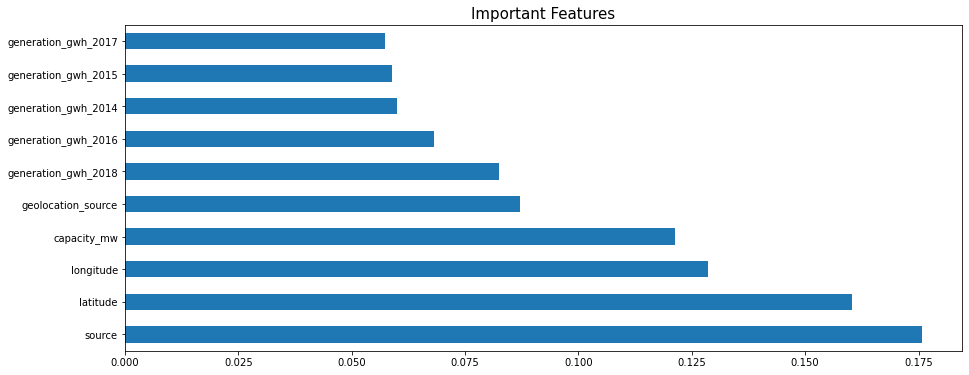

In [42]:
plt.figure(figsize=(15,6))
plt.title('Important Features',fontsize=15)
feat_importance=pd.Series(extra.feature_importances_,index=x.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show();

## Model Building:

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc
from imblearn.over_sampling import SMOTE

In [53]:
def model_run(clf,x,y):
    max_accuracy=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i,stratify=y)
        #x_train,y_train=SMOTE().fit_resample(x_train,y_train) ##over sampling of our Data
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        accuracy_check=accuracy_score(y_test,pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max accuracy score corresponding to',final_r,'is',max_accuracy*100)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='accuracy').mean()*100)
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='accuracy').std()*100)
    print('\n')
    print('F1 score',f1_score(y_test,pred)*100)
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train)*100)
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test)*100)
    print('\n')
    print('Confusion Matrix',confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report',classification_report(y_test,pred))
    print('\n')
    print('Roc_auc Score',roc_auc_score(y_test,pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")
    return final_r



## Logistic Regression

max accuracy score corresponding to 83 is 79.93421052631578


cross validation score 74.11216779572693


Standard Deviation 1.8122704875821842


F1 score 74.40273037542661


Training accuracy 73.14662273476112


Test Accuracy 75.32894736842105


Confusion Matrix [[120  32]
 [ 43 109]]


Classification Report               precision    recall  f1-score   support

           0       0.74      0.79      0.76       152
           1       0.77      0.72      0.74       152

    accuracy                           0.75       304
   macro avg       0.75      0.75      0.75       304
weighted avg       0.75      0.75      0.75       304



Roc_auc Score 0.7532894736842105





83

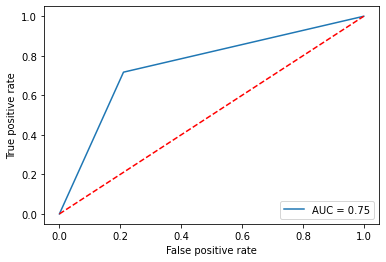

In [54]:
lg=LogisticRegression()
model_run(lg,x,y)

## Decision Tree:

max accuracy score corresponding to 74 is 91.11842105263158


cross validation score 86.76220253604306


Standard Deviation 2.232319133159832


F1 score 83.27868852459017


Training accuracy 100.0


Test Accuracy 83.22368421052632


Confusion Matrix [[126  26]
 [ 25 127]]


Classification Report               precision    recall  f1-score   support

           0       0.83      0.83      0.83       152
           1       0.83      0.84      0.83       152

    accuracy                           0.83       304
   macro avg       0.83      0.83      0.83       304
weighted avg       0.83      0.83      0.83       304



Roc_auc Score 0.8322368421052632





74

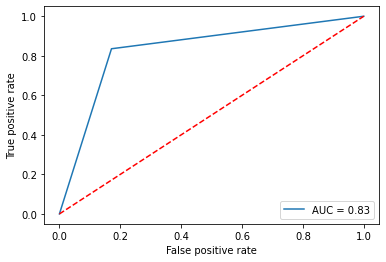

In [55]:
dt = DecisionTreeClassifier()
model_run(dt,x,y)

## KNN:

max accuracy score corresponding to 90 is 88.1578947368421


cross validation score 83.13705054715997


Standard Deviation 1.927354651663837


F1 score 85.625


Training accuracy 88.96210873146623


Test Accuracy 84.86842105263158


Confusion Matrix [[121  31]
 [ 15 137]]


Classification Report               precision    recall  f1-score   support

           0       0.89      0.80      0.84       152
           1       0.82      0.90      0.86       152

    accuracy                           0.85       304
   macro avg       0.85      0.85      0.85       304
weighted avg       0.85      0.85      0.85       304



Roc_auc Score 0.8486842105263157





90

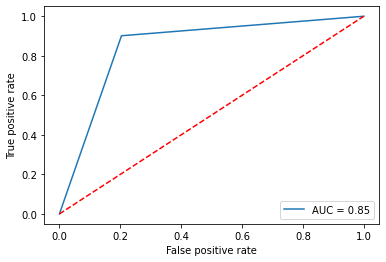

In [56]:
knn = KNeighborsClassifier()
model_run(knn,x,y)

## Random Forest:

max accuracy score corresponding to 76 is 94.4078947368421


cross validation score 91.63626889004689


Standard Deviation 1.6541460656502878


F1 score 88.67313915857605


Training accuracy 100.0


Test Accuracy 88.48684210526315


Confusion Matrix [[132  20]
 [ 15 137]]


Classification Report               precision    recall  f1-score   support

           0       0.90      0.87      0.88       152
           1       0.87      0.90      0.89       152

    accuracy                           0.88       304
   macro avg       0.89      0.88      0.88       304
weighted avg       0.89      0.88      0.88       304



Roc_auc Score 0.8848684210526316





76

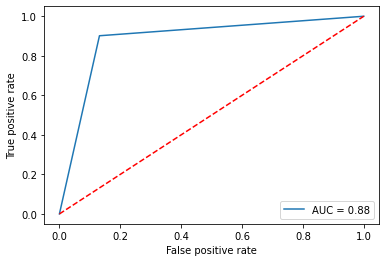

In [57]:
rf = RandomForestClassifier()
model_run(rf,x,y)

## Ada Boost:

max accuracy score corresponding to 61 is 85.85526315789474


cross validation score 81.62432690637485


Standard Deviation 2.8291188700359298


F1 score 84.5679012345679


Training accuracy 86.73805601317957


Test Accuracy 83.55263157894737


Confusion Matrix [[117  35]
 [ 15 137]]


Classification Report               precision    recall  f1-score   support

           0       0.89      0.77      0.82       152
           1       0.80      0.90      0.85       152

    accuracy                           0.84       304
   macro avg       0.84      0.84      0.83       304
weighted avg       0.84      0.84      0.83       304



Roc_auc Score 0.8355263157894737





61

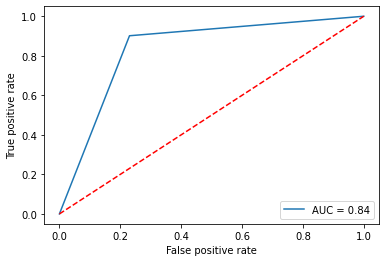

In [58]:
adb = AdaBoostClassifier()
model_run(adb,x,y)

## Gradient Boost:

max accuracy score corresponding to 86 is 92.76315789473685


cross validation score 87.15563661629322


Standard Deviation 1.4387752559503186


F1 score 87.41721854304636


Training accuracy 94.48105436573312


Test Accuracy 87.5


Confusion Matrix [[134  18]
 [ 20 132]]


Classification Report               precision    recall  f1-score   support

           0       0.87      0.88      0.88       152
           1       0.88      0.87      0.87       152

    accuracy                           0.88       304
   macro avg       0.88      0.88      0.87       304
weighted avg       0.88      0.88      0.87       304



Roc_auc Score 0.875





86

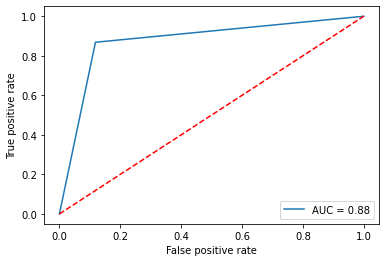

In [59]:
gb = GradientBoostingClassifier()
model_run(gb,x,y)

####accuracy score of random forest classifier is almost 94 and as the difference of Accuracy Score and CV of Random Forest Classifier is very less but not least. But we are going to do hyperparameter tuning of RFC because the False positive number is the least for rfc. Hence, it's the best Model. Let's do Hyperparameter Tuning of RFC.

## Hyperparameter Tuning: 

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=76,stratify=y)
rf = RandomForestClassifier()
params={'n_estimators':[12,13,15,17],
       'criterion':['entropy','gini'],
       'max_depth':[10,13,15,17],
       'min_samples_split':[10,12,11,13],
       'min_samples_leaf':[4,5,6,8]}

grd= GridSearchCV(rf,param_grid=params)
grd.fit(x_train,y_train)
print('best_params=> ',grd.best_params_)

rfc=grd.best_estimator_ #reinstantiating with best params
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

rfc_conf_mat = confusion_matrix(y_test,y_pred)
print('con_mat=> ','\n',rfc_conf_mat)
print('Accuracy of rf After Hyperparameter Tuning==> ',accuracy_score(y_test,y_pred)*100)

best_params=>  {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 15}
con_mat=>  
 [[137  15]
 [ 22 130]]
Accuracy of rf After Hyperparameter Tuning==>  87.82894736842105


#### Despite tuning the Random forest classifier to the best parameters, the accuracy (94%) did not increase. Let's check the classification report to verify.

In [64]:
Report = classification_report(y_test,y_pred)
print(Report)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       152
           1       0.90      0.86      0.88       152

    accuracy                           0.88       304
   macro avg       0.88      0.88      0.88       304
weighted avg       0.88      0.88      0.88       304



#### After hyperparameter tuning, the classification report shows less accuracy, so we will save the prior RFC model because of its accuracy.

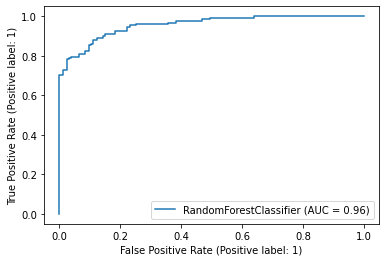

In [65]:
disp = plot_roc_curve(rfc,x_test,y_test)

#### Therefore, Random Forest Classifier is the best model since the density of area under curve is almost 96%

## Save the best fit Model: 

In [66]:
import joblib
joblib.dump(rf,'fuel.pkl')

['fuel.pkl']

#### Our next step is to predict the electrical generating capacity in megawatts. As capacity_mw is a continuous variable, this is a regression type of problem. First, we will check the clean data, then we will divide the dataset into labels and functions.

In [67]:
df.head()   #checking the clean dataset

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,-0.944854,0,109.0,1.0,-0.046742,-0.052449,-0.050215,-0.039359,-0.061174
1,98.0,24.7663,-0.534212,0,174.0,2.0,-0.046742,-0.052449,-0.050215,-0.039359,-0.061174
2,39.2,21.9038,-2.390933,0,21.0,2.0,-0.046742,-0.052449,-0.050215,-0.039359,-0.061174
3,135.0,23.8712,2.167755,1,22.0,2.0,-0.243102,0.072704,0.083178,-0.185637,-0.184018
4,1800.0,21.9603,1.126913,0,22.0,2.0,1.152947,1.836146,1.842814,1.621580,1.919439


In [68]:
## separate the label and functions Y and X respectively.
Y=df['capacity_mw']
X=df.drop(columns=['capacity_mw'])

## Standardization: 

In [69]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [70]:
y

0       0
1       0
2       0
3       1
4       0
       ..
1513    1
1514    1
1515    1
1516    1
1517    1
Name: primary_fuel, Length: 1518, dtype: int32

In [71]:
x

,capacity_mw,latitude,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.500000,28.183900,-0.944854,109.000000,1.0,-0.046742,-0.052449,-0.050215,-0.039359,-0.061174
1,98.000000,24.766300,-0.534212,174.000000,2.0,-0.046742,-0.052449,-0.050215,-0.039359,-0.061174
2,39.200000,21.903800,-2.390933,21.000000,2.0,-0.046742,-0.052449,-0.050215,-0.039359,-0.061174
3,135.000000,23.871200,2.167755,22.000000,2.0,-0.243102,0.072704,0.083178,-0.185637,-0.184018
4,1800.000000,21.960300,1.126913,22.000000,2.0,1.152947,1.836146,1.842814,1.621580,1.919439
...,...,...,...,...,...,...,...,...,...,...
1513,76.416992,22.457730,-0.273540,117.083285,2.0,-0.046742,-0.052449,-0.050215,-0.039359,-0.061174
1514,31.723620,16.677243,-0.311299,29.643635,2.0,-0.046742,-0.052449,-0.050215,-0.039359,-0.061174
1515,438.134160,22.677386,0.593382,22.000000,2.0,-1.116447,-1.202581,-1.221106,-0.042495,-1.369492
1516,77.340787,18.929237,-0.999082,126.203431,2.0,-0.046742,-0.052449,-0.050215,-0.039359,-0.061174


# Model Creation: 

In [72]:
## Importing machine learning Library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score

In [73]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=76)

In [74]:
def maxr2_score(clf,X,Y):
    maxr2_score1=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        r2_cscore=r2_score(y_test,pred)
        if r2_cscore>maxr2_score1:
            maxr2_score1=r2_cscore
            final_r=i
    print('max r2 score corresponding to',final_r,'is',maxr2_score1*100)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='r2').mean()*100)
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='r2').std()*100)
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train)*100)
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test)*100)
    print('\n')
    print('MAE',mean_absolute_error(y_test,pred))
    print('\n')
    print('MSE',mean_squared_error(y_test,pred))
    print('\n')
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    print('\n')
    sns.regplot(pred,y_test)
    return final_r

## Linear Regression:

max r2 score corresponding to 78 is 38.41876091522839


cross validation score -33.793523896475556


Standard Deviation 27.870037844028733


Training accuracy 31.389080946924373


Test Accuracy 28.506680082877445


MAE 0.36632503554259643


MSE 0.17810668114308262


RMSE 0.4220268725366699




78

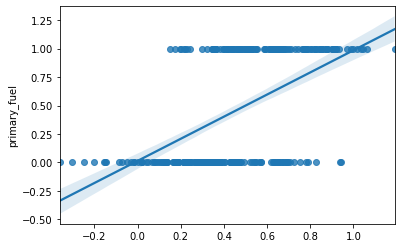

In [75]:
lgr=LinearRegression()
maxr2_score(lgr,x,y)

## Ridge:

max r2 score corresponding to 78 is 38.41701458904614


cross validation score -33.7542393484357


Standard Deviation 27.84305400109442


Training accuracy 31.388751845771402


Test Accuracy 28.503719526124783


MAE 0.36639912151804266


MSE 0.17811405658652493


RMSE 0.4220356105668394




78

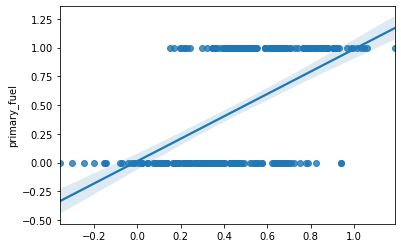

In [76]:
ridge=Ridge()
maxr2_score(ridge,X,Y)

## Decision Tree Regressor:

max r2 score corresponding to 54 is 61.8404536207419


cross validation score -12.779571707715359


Standard Deviation 13.9454575618917


Training accuracy 100.0


Test Accuracy 56.426182513139025


MAE 0.10855263157894737


MSE 0.10855263157894737


RMSE 0.3294732638302346




54

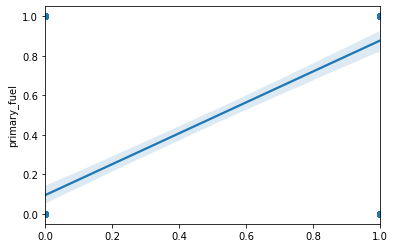

In [77]:
dtr = DecisionTreeRegressor()
maxr2_score(dtr,X,Y)

## Random Forest: 

max r2 score corresponding to 54 is 78.86632212266805


cross validation score 18.696488963609628


Standard Deviation 16.319652861825638


Training accuracy 95.93380130738826


Test Accuracy 71.29541762585241


MAE 0.1630921052631579


MSE 0.07150986842105263


RMSE 0.2674132914068645




54

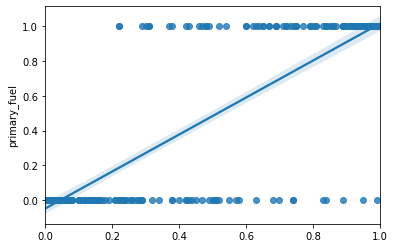

In [78]:
rfr = RandomForestRegressor()
maxr2_score(rfr,X,Y)

#### Based on the above table, we can see that the Random Forest achieves the maximum R2 score. Additionally, the training and testing accuracy are also quite good compared to the other models.The MAE and RMSE errors are also the lowest among the other models. Therefore, we will use this model for hyperparameter tuning.

## Hyper perametertuning: 

In [79]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=54,test_size=.20)
forest=RandomForestRegressor()
param={'n_estimators':[50,100,200],'max_depth':[10,50,None],'max_features': [1,2,3],'bootstrap': [True, False]}
glf=GridSearchCV(estimator=forest,param_grid=param,scoring='r2',n_jobs=-1)
glf.fit(x_train,y_train)
glf.best_params_

{'bootstrap': True, 'max_depth': None, 'max_features': 2, 'n_estimators': 200}

 Mean Absolute Error (MAE) : 10548.079802915367
Mean Squared Error (MSE) : 4914299.7887395
Root Mean Squared Error : 22168.22002042451
R_2 score: 77.47903435945437


<AxesSubplot:ylabel='capacity_mw'>

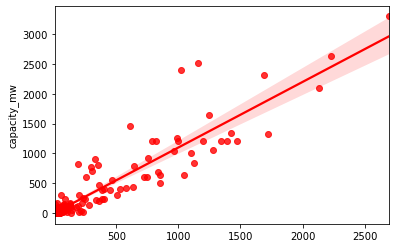

In [80]:
forest=RandomForestRegressor(bootstrap=True,max_depth=None,max_features=2,n_estimators=200)
forest.fit(x_train,y_train)
pred=forest.predict(x_test)
print(' Mean Absolute Error (MAE) :',mean_absolute_error(pred,y_test)*100)
print('Mean Squared Error (MSE) :',mean_squared_error(pred,y_test)*100)
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(pred,y_test))*100)
print('R_2 score:',r2_score(pred,y_test)*100)
## best fit line
sns.regplot(pred,y_test,color='r')

### Hyperparameter tuning our R_2 score is 77 which is low with param tuning, we will save without hyperparameter tuning RF model.

## Saving the model: 

In [81]:
import joblib
joblib.dump(rfr,'rfr_Capcity_mw.pkl')

['rfr_Capcity_mw.pkl']

## Loading the model: 

In [82]:
loaded_model=joblib.load('rfr_Capcity_mw.pkl')
prediction=loaded_model.predict(x_test)

In [84]:
prediction


array([0.28, 0.07, 0.28, 0.2 , 0.26, 0.07, 0.07, 0.36, 0.21, 0.09, 0.12,
       0.22, 0.38, 0.23, 0.27, 0.22, 1.  , 0.08, 0.3 , 1.  , 0.19, 0.07,
       0.12, 0.33, 0.1 , 1.  , 0.22, 0.17, 0.33, 0.33, 0.24, 0.26, 0.09,
       0.25, 0.11, 0.57, 0.24, 0.45, 0.36, 1.  , 0.13, 1.  , 0.1 , 0.08,
       0.36, 0.27, 0.98, 0.33, 0.41, 0.07, 0.08, 0.13, 0.22, 0.09, 0.11,
       0.1 , 0.07, 0.12, 0.18, 0.07, 0.68, 0.78, 0.28, 0.35, 0.07, 0.07,
       0.08, 1.  , 0.05, 0.98, 0.18, 0.1 , 0.09, 0.34, 0.33, 0.69, 0.17,
       0.74, 0.06, 0.07, 0.93, 1.  , 0.07, 0.11, 0.1 , 0.67, 0.34, 1.  ,
       0.11, 0.7 , 0.12, 0.09, 0.07, 0.11, 0.23, 1.  , 0.38, 0.98, 0.07,
       0.39, 0.4 , 0.08, 0.27, 0.11, 0.21, 0.07, 0.27, 0.28, 0.41, 0.05,
       1.  , 0.13, 0.36, 0.29, 0.22, 1.  , 0.29, 0.07, 0.57, 0.67, 0.07,
       0.09, 0.57, 0.34, 0.15, 0.34, 0.34, 0.67, 1.  , 0.24, 0.05, 0.4 ,
       0.31, 0.29, 0.31, 0.13, 0.07, 0.08, 1.  , 0.23, 0.83, 0.2 , 0.36,
       0.36, 0.12, 0.07, 0.16, 0.36, 0.07, 0.21, 0.

## Complete;